## chars2vec

In [1]:
import chars2vec
import sklearn.decomposition
import matplotlib.pyplot as plt

# 加载预训练的Char2Vec模型
c2v_model = chars2vec.load_model('eng_50')

# 定义一些单词
words = ['Natural', 'Language', 'Understanding',
         'Naturael', 'Longuge', 'Updderctundjing',
         'Motural', 'Lamnguoge', 'Understaating',
         'Naturrow', 'Laguage', 'Unddertandink',
         'Nattural', 'Languagge', 'Umderstoneding']

# 将单词向量化
word_embeddings = c2v_model.vectorize_words(words)

# 使用PCA将词嵌入向量映射到二维平面
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


/Users/hayden/anaconda3/envs/ait/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=('*',)
  warnings.warn(


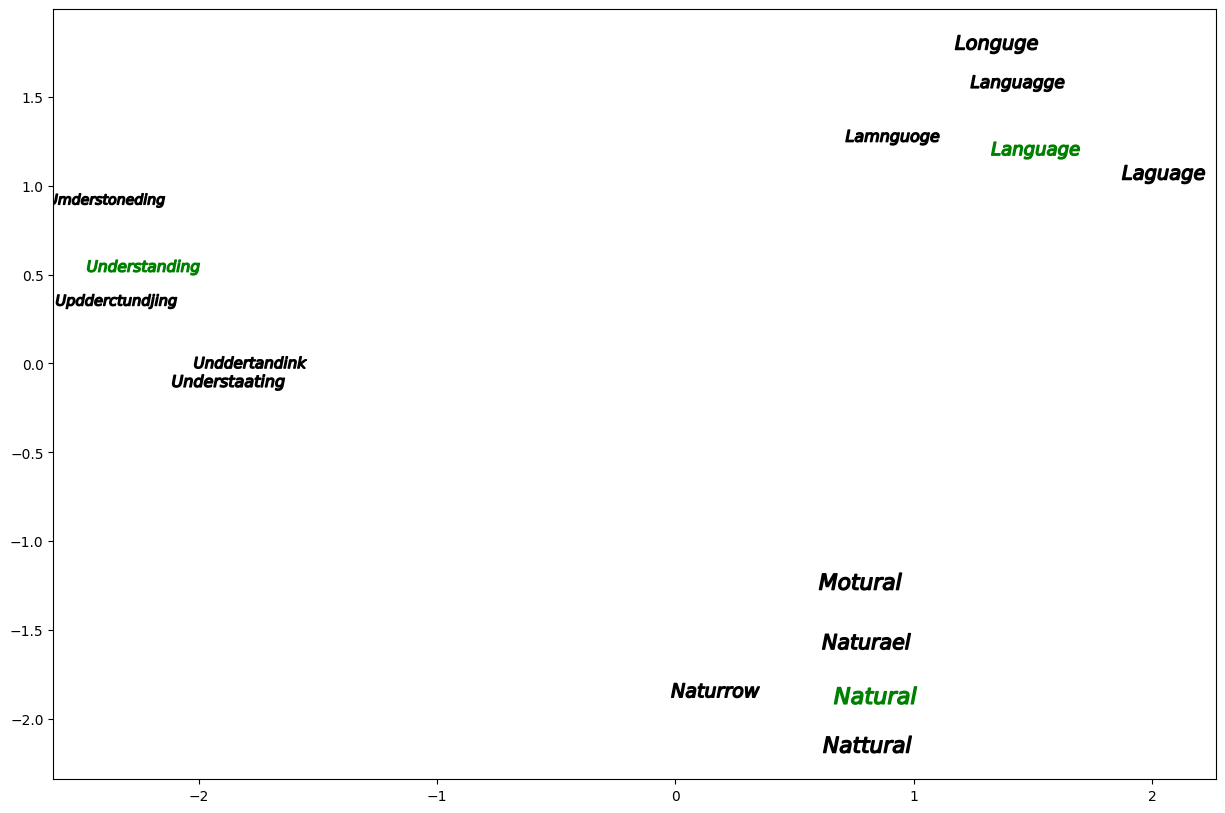

In [2]:

# 绘制结果
f = plt.figure(figsize=(15, 10))
for j in range(len(projection_2d)):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j,
                facecolors='green' if words[j] in ['Natural', 'Language', 'Understanding'] else 'black')
plt.show()

# Doc2Vec

In [3]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

print(common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [4]:
# 拼接数据
documents = [TaggedDocument(doc, [i]) for i,doc in enumerate(common_texts)]
# 模型训练
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=3)

- Doc2Vec 是 Gensim 提供的一个类，用于训练 Doc2Vec 模型。
- documents 是一个包含标记文档的列表。
- vector_size=5：设置文档向量的维度大小为 5。
- window=2：设置窗口大小为 2，即在训练过程中考虑目标词周围 2 个词的上下文。
- min_count=1：忽略所有在文档中出现次数少于 1 次的单词。
- workers=3：设置并行工作的线程数为 3。

In [5]:
# 预测文本对应向量的时候，实际上是基于训练好的单词向量(冻结固定)，然后反向传播更新待预测文本/文档对应的特征向量
vector = model.infer_vector(["system", "response"])
print("【Doc2Vec结果】:\n{}".format(vector))

【Doc2Vec结果】:
[-0.00398793 -0.03013565  0.0487725   0.0614016  -0.05267948]


In [6]:
common_texts[0]

['human', 'interface', 'computer']

In [7]:
model.infer_vector(common_texts[0])

array([ 0.03473282,  0.01612266, -0.09687345, -0.06187785, -0.01240398],
      dtype=float32)

# FastText

FastText 在词嵌入领域非常有名，因为它不仅能够为每个单词创建向量表示，还能处理那些在训练集中未曾见过的单词（通过组合单词内的字符 n-gram 向量）。这种方法对于处理生僻词汇或拼写错误特别有用。

In [8]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [9]:
from gensim import utils
from gensim.models.fasttext import FastText

word_file_path = './datas/cut_words_of_in_the_name_of_people.txt'
class MyData(object):
    def __iter__(self):
        path = word_file_path
        with open(path, 'r', encoding='utf-8') as reader:
            for line in reader:
                yield list(utils.tokenize(line))

# 模型构建
model = FastText(vector_size=4, window=3, min_count=1, sentences=MyData(), epochs=10)

2024-11-01 10:44:11,261 : INFO : collecting all words and their counts
2024-11-01 10:44:11,262 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-01 10:44:11,310 : INFO : collected 17807 word types from a corpus of 131945 raw words and 2421 sentences
2024-11-01 10:44:11,310 : INFO : Creating a fresh vocabulary
2024-11-01 10:44:11,330 : INFO : FastText lifecycle event {'msg': 'effective_min_count=1 retains 17807 unique words (100.00% of original 17807, drops 0)', 'datetime': '2024-11-01T10:44:11.330371', 'gensim': '4.3.3', 'python': '3.10.14 (main, May  6 2024, 14:42:37) [Clang 14.0.6 ]', 'platform': 'macOS-14.4-arm64-arm-64bit', 'event': 'prepare_vocab'}
2024-11-01 10:44:11,331 : INFO : FastText lifecycle event {'msg': 'effective_min_count=1 leaves 131945 word corpus (100.00% of original 131945, drops 0)', 'datetime': '2024-11-01T10:44:11.331090', 'gensim': '4.3.3', 'python': '3.10.14 (main, May  6 2024, 14:42:37) [Clang 14.0.6 ]', 'platform': 'macOS-14.

In [10]:
# 假设这是你从文件中读取的一行文本
line = "Here is an example sentence to be tokenized."

# 使用 gensim 的 simple_preprocess 方法来分词
tokens = list(utils.tokenize(line))
print(tokens)

['Here', 'is', 'an', 'example', 'sentence', 'to', 'be', 'tokenized']


- __iter__ 方法告诉 Python 解释器这个类的对象可以被迭代。当一个对象被称为“可迭代”时，意味着你可以用 for 循环来遍历它。
- yield 关键字用于定义生成器。每当迭代到这一行时，函数会暂停并发送给调用者一个值（这里是 list(utils.tokenize(line))），然后保留当前状态，直到下次迭代时从 yield 表达式后继续执行。utils.tokenize(line) 是一个工具方法，用于将输入的字符串 line 分割成词汇列表。结果会被转换成列表类型。

In [11]:
# 夹角余弦相似度
req_count = 5
for key in model.wv.similar_by_word('沙瑞金', topn =100):
    if len(key[0])==3:
        req_count -= 1
        print(key[0], key[1])
        if req_count == 0:
            break

起念要 0.9989292025566101
克利斯 0.9974198341369629
他略感 0.9964163303375244
一栋栋 0.9961082339286804
后悔药 0.994805634021759


In [12]:
# 夹角余弦相似度
req_count = 5
for key in model.wv.similar_by_word('沙瑞金', topn =100):
    # if len(key[0])==3:
    req_count -= 1
    print(key[0], key[1])
    if req_count == 0:
        break

神经 0.9999484419822693
一生一世 0.9996981024742126
外国 0.9993759989738464
合情合理 0.9993451237678528
准时 0.9990607500076294
